# <center>Topic Modelling using PLSA</center> 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

In [5]:
df=pd.read_csv('india-news-headlines.csv')

In [6]:
df.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [7]:
data_text = df[['headline_text']].astype('str')

In [8]:
data_text.shape

(3297172, 1)

In [9]:
data_text=data_text.loc[1:100000,:]

In [10]:
data_text.shape

(100000, 1)

In [12]:
stopw=stopwords.words('english')
def stopwords_remove(x):
    terms=x.split()
    terms=[w for w in terms if w not in stopw]
    sentence=' '.join(terms)
    return sentence
data_text['Refined_headlines']=data_text['headline_text'].apply(lambda x: stopwords_remove(x))

In [16]:
def word_count(x):
    terms = x.split()
    return len(terms)
data_text['Word_Count']=data_text['Refined_headlines'].apply(lambda x: word_count(x))

In [17]:
data_text.head()

,headline_text,Refined_headlines,Word_Count
1,Status quo will not be disturbed at Ayodhya; s...,Status quo disturbed Ayodhya; says Vajpayee,6
2,Fissures in Hurriyat over Pak visit,Fissures Hurriyat Pak visit,4
3,America's unwanted heading for India?,America's unwanted heading India?,4
4,For bigwigs; it is destination Goa,For bigwigs; destination Goa,4
5,Extra buses to clear tourist traffic,Extra buses clear tourist traffic,5


In [18]:
data_text['Word_Count'].describe()

count    100000.000000
mean          4.751210
std           1.341384
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          16.000000
Name: Word_Count, dtype: float64

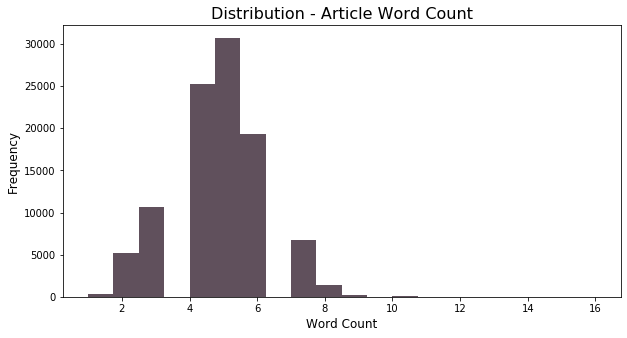

In [19]:
fig = plt.figure(figsize=(10,5))

plt.hist(
    data_text['Word_Count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)

plt.show()

In [20]:
headline_sentences=[''.join(text) for text in data_text['Refined_headlines']]

In [21]:
vectorizer = CountVectorizer(max_features=5000)
x_counts = vectorizer.fit_transform(headline_sentences)

In [22]:
x_counts

<100000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 374810 stored elements in Compressed Sparse Row format>

In [23]:
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

In [24]:
x_tfidf

<100000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 374810 stored elements in Compressed Sparse Row format>

In [25]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [26]:
#number of topics
num_topics=5
#obtain a NMF model.
model = NMF(n_components=num_topics, init='nndsvd');
#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [27]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words
    
    return pd.DataFrame(word_dict)

In [28]:
get_nmf_topics(model, 30)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,the,india,city,new,it
1,man,us,round,police,govt
2,speaking,pak,sports,year,time
3,counsellor,china,police,gets,no
4,art,says,scan,chief,says
5,week,terrorism,briefs,cm,bjp
6,life,musharraf,old,get,day
7,world,may,power,set,life
8,mall,no,water,york,cong
9,sound,visit,up,look,state
